# Data Loading & Lib's

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
df = pd.read_csv('/content/train.csv.zip')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Data Preprocessing

In [84]:
# Converting date col into datetime.
df['Date'] = pd.to_datetime(df['Date'])

# Sort values.
df = df.sort_values(by=['Store', 'Dept', 'Date'])

In [85]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [86]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [87]:
# Total Sales per date.
total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
total_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


# Time based features

> Time-based features are derived from the timestamps associated with your data points. Some of the time base features are discuss below:

In [88]:
# Set 'Date' as the index
total_sales = total_sales.set_index('Date')

# Time based Features.
total_sales['Day'] = total_sales.index.day
total_sales['Month'] = total_sales.index.month
total_sales['Year'] = total_sales.index.year
total_sales['Week'] = total_sales.index.isocalendar().week

# Lag based Features.

total_sales['lag_1'] = total_sales['Weekly_Sales'].shift(1) # It shifts 'weekly sales' col by one shift back
total_sales['lag_2'] = total_sales['Weekly_Sales'].shift(2)
total_sales['Rolling_Means'] = total_sales['Weekly_Sales'].rolling(3).mean()

In [89]:
total_sales.dropna(inplace= True)

# Data Splitting & Model Evaluation

In [90]:
x = total_sales.drop('Weekly_Sales', axis=1)
y = total_sales['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((112, 7), (29, 7))

In [91]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [92]:
print(f'R2 Score: {r2_score(y_test, y_pred_rf):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf):.2f}')

R2 Score: 0.12
MSE: 15842689916551.89


**Bonus Work: **
# XGBoost & LightGBM


In [93]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators= 100, learning_rate= 0.005, random_state= 42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [94]:
print(f'XGB R2 Score: {r2_score(y_test, y_pred_xgb):.2f}')
print(f'XGB MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}')

XGB R2 Score: 0.63
XGB MSE: 6700180064779.49


In [102]:
lgbm = LGBMRegressor(n_estimators= 100, learning_rate= 0.005, random_state= 42)
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 7
[LightGBM] [Info] Start training from score 47005522.357143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [104]:
print(f'LGBM R2 Score: {r2_score(y_test, y_pred_lgbm):.2f}')
print(f'LGBM MSE Score: {mean_squared_error(y_test, y_pred_lgbm):.2f}')

LGBM R2 Score: 0.29
LGBM MSE Score: 12823636329052.14


# Actual vs Predicted Plotting

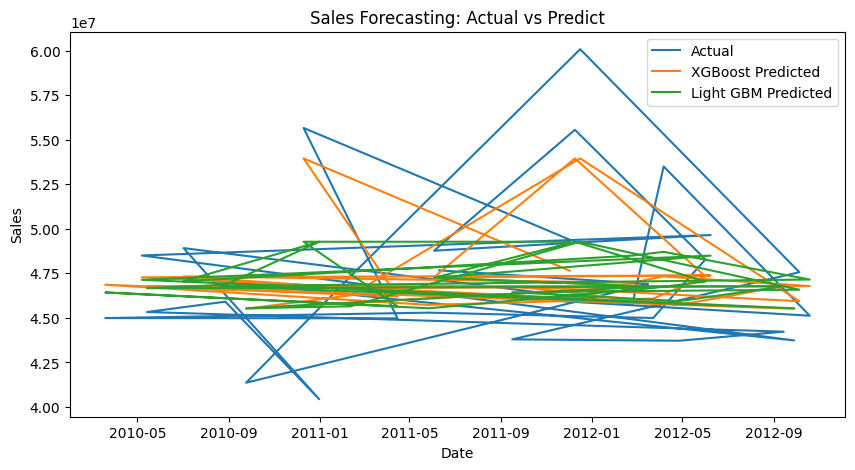

In [105]:
plt.figure(figsize= (10, 5))
plt.plot(y_test.index, y_test.values, label= 'Actual')
plt.plot(y_test.index, y_pred_xgb, label= 'XGBoost Predicted')
plt.plot(y_test.index, y_pred_lgbm, label= 'Light GBM Predicted')
plt.title('Sales Forecasting: Actual vs Predict')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Rolling Avg VS Seasonal Decomposition

In [106]:
# Calculate a 7-day rolling average of Weekly_Sales
total_sales['Rolling_Avg_7_Days'] = total_sales['Weekly_Sales'].rolling(window=7).mean()
print(total_sales[['Weekly_Sales', 'Rolling_Avg_7_Days']].sample(5))

            Weekly_Sales  Rolling_Avg_7_Days
Date                                        
2010-07-09   47899529.37        4.811724e+07
2011-10-14   44374820.30        4.463346e+07
2011-08-05   48015466.97        4.625871e+07
2010-04-16   45183667.08        4.641323e+07
2011-01-14   40673678.04        5.317286e+07


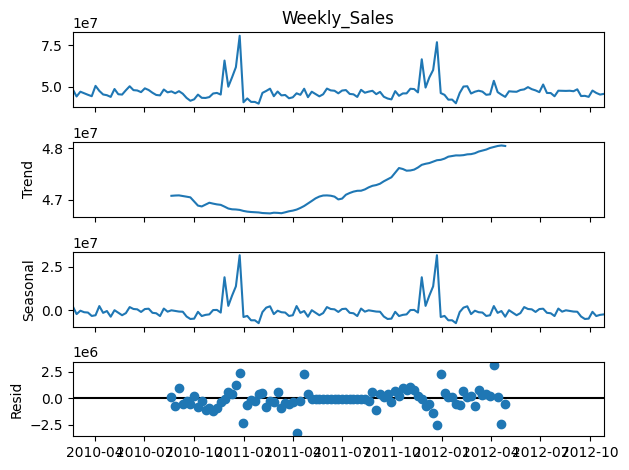

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming weekly data with a yearly seasonality (52 weeks)
decomposition = seasonal_decompose(total_sales['Weekly_Sales'], model='additive', period=52)
fig = decomposition.plot()
fig.figsize=(10, 8)
plt.show()